In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
Recency - Date of purchase
Frequency - Invoice no
Monetry - Price
For customerId


In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
df = df[['CustomerID','InvoieNo','Date of purchase','Price']]

In [ ]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.isnull().sum()/len(df)*100

CustomerID          25.304556
InvoieNo             0.579728
Date of purchase     0.579728
Price                0.579728
dtype: float64

In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.isnull().sum()/len(df)*100

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [ ]:
df.shape

(404189, 4)

In [ ]:
df.duplicated().sum()

1330

In [ ]:
import datetime

In [ ]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404189 non-null  float64       
 1   InvoieNo          404189 non-null  float64       
 2   Date of purchase  404189 non-null  datetime64[ns]
 3   Price             404189 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [ ]:
df = df.drop_duplicates(ignore_index=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402859 entries, 0 to 402858
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   Invoice_No  402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.3 MB


In [ ]:
df = df.rename(columns = {'InvoieNo': 'Invoice_No','Date of purchase':'Date' })

In [ ]:
df['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [ ]:
new_date = datetime.datetime(2017,12,20)

In [ ]:
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [ ]:
RMFApproach = df.groupby('CustomerID').agg({'Date': lambda x : (new_date - x.max()).days,
                                           'Invoice_No' : lambda x : x.count(),
                                           'Price' : lambda x : x.sum()})

RMFApproach.rename(columns = {'Date':'Recency', 'Invoice_No': 'Frequency', 'Price': 'Monetory'}, inplace=True)

In [ ]:
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [ ]:
RMFApproach.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,61.445160,92.632559,2.294939e+05
std,89.656941,230.742279,8.556685e+05
min,1.000000,1.000000,-5.037200e+04
25%,10.000000,17.000000,3.814000e+04
50%,19.000000,42.000000,8.363500e+04
75%,73.000000,101.000000,2.054440e+05
max,617.000000,7919.000000,3.547209e+07


In [ ]:
# Split the data into 4 segment basis quantile method

quantiles = RMFApproach.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
def Recency_value(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4
 

In [ ]:
def Freq_Monetry_value(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else :
        return 1

In [ ]:
RMFApproach['R'] = RMFApproach['Recency'].apply(Recency_value, args=('Recency', quantiles ))

RMFApproach['F'] = RMFApproach['Frequency'].apply(Freq_Monetry_value, args=('Frequency', quantiles ))

RMFApproach['M'] = RMFApproach['Monetory'].apply(Freq_Monetry_value, args=('Monetory', quantiles ))

In [ ]:
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,751,279720.0,1,1,1,3


In [ ]:
RMFApproach['RFM'] = RMFApproach[['R','F','M']].sum(axis=1)

In [ ]:
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,751,279720.0,1,1,1,3


In [ ]:
Loyality_Level = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RMFApproach.RFM, q=4, labels = Loyality_Level)
RMFApproach['Loyality_Level'] = score_cuts.values
RMFApproach = RMFApproach.reset_index()
RMFApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_Level
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,Silver
4,6.0,9,84,151822.0,1,2,2,5,Platinum
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [ ]:
RMFApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [ ]:
RMFApproach.to_csv("my_analysis.csv")

In [ ]:
final_report = RMFApproach.groupby('Loyality_Level')[['Recency', 'Frequency', 'Monetory',
                                                     'CustomerID']].agg({
    'Recency' :'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'
    
}).reset_index()

In [ ]:
final_report

,Loyality_Level,Recency,Frequency,Monetory,NumBuyers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [ ]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})

In [ ]:
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)

In [ ]:
final_report

,Loyality_Level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [ ]:
final_report1 = final_report[['Loyality_Level','NumBuyers', 'Percent']]
final_report1

,Loyality_Level,NumBuyers,Percent
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [ ]:
import squarify

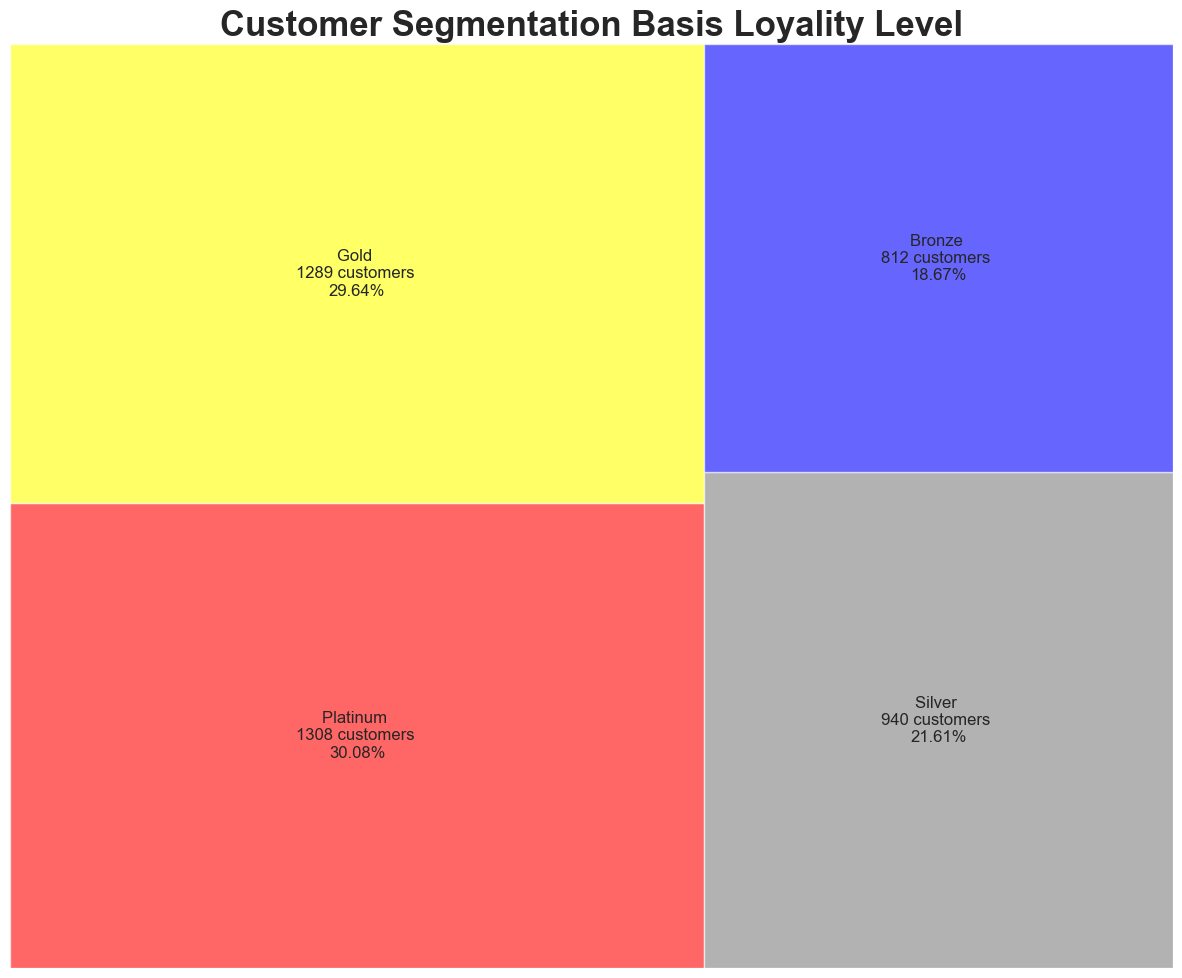

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Platinum':'red', 'Gold':'yellow', 'Silver':'gray','Bronze':'blue'}

squarify.plot(sizes=final_report1['NumBuyers'],color=colors_dics.values(),
             label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for 
                     i in range(0, len(final_report1))], alpha=0.6)

plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight='bold')
plt.axis('off')
plt.show()